In [1]:
# System
import os

# Web Scraping
import requests
from bs4 import BeautifulSoup

# Data
import numpy as np
import pandas as pd

# View
import matplotlib.pyplot as plt
import seaborn as sns

# ML
import sklearn
from sklearn.model_selection import train_test_split
os


<module 'os' from 'C:\\Users\\lior1\\anaconda3\\lib\\os.py'>

In [2]:
# Utilities Files
def read_csv(name: str, index_label='id') -> pd.DataFrame:
    return pd.read_csv('../data/' + name + '.csv', index_col=index_label)


def save_csv(df: pd.DataFrame, name: str, index_label='id'):
    df.to_csv('../data/' + name + '.csv', index_label=index_label)


In [3]:
df = read_csv('businesses')

In [4]:
target= df[["has_exp_level","ExpensiveLevel"]]
data= df.drop(["has_exp_level","ExpensiveLevel","Url","Name"],axis=1)

In [5]:
Y=target["has_exp_level"]
X=data
X_train, X_finale_test, y_train, y_finale_test = train_test_split(X, Y, test_size=0.03, random_state=69)

In [6]:
df=pd.concat([y_train,X_train],axis=1)

In [7]:
df=df.reset_index(drop=True)

In [28]:
first_collumns=[
    'Claimed', 'HasWebsite',
    'Stars', 'Reviews', 'Photos',
    'SubCategoriesCount', 'AttributesCount',
    'QuestionsCount',
    'WeeklyHours', 'WeeklyBreaks', 'WeeklyDays',
]
target_collumn="has_exp_level"

In [29]:
df["has_exp_level"]=df["has_exp_level"].astype(int)

In [32]:
df[first_collumns+[target_collumn]].describe()

,Claimed,HasWebsite,Stars,Reviews,Photos,SubCategoriesCount,AttributesCount,QuestionsCount,WeeklyHours,WeeklyBreaks,WeeklyDays,has_exp_level
count,26429.000000,26429.000000,26429.000000,26429.000000,26429.000000,26429.000000,26429.000000,26429.000000,26429.000000,26429.000000,26429.000000,26429.000000
mean,0.674751,0.816376,8.359454,293.905180,383.056075,2.085247,3.912785,3.655606,108.337092,0.692232,4.979908,0.342730
std,0.468477,0.387185,0.965525,583.564754,843.154230,0.832565,1.012783,0.720185,57.668911,1.873341,1.863496,0.474631
min,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,8.000000,19.000000,34.000000,1.000000,4.000000,4.000000,72.000000,0.000000,5.000000,0.000000
50%,1.000000,1.000000,8.000000,94.000000,124.000000,2.000000,4.000000,4.000000,114.000000,0.000000,6.000000,0.000000
75%,1.000000,1.000000,9.000000,318.000000,387.000000,3.000000,4.000000,4.000000,148.000000,0.000000,6.000000,1.000000
max,1.000000,1.000000,10.000000,16981.000000,31726.000000,4.000000,9.000000,4.000000,336.000000,14.000000,6.000000,1.000000


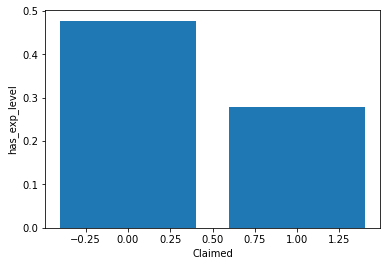

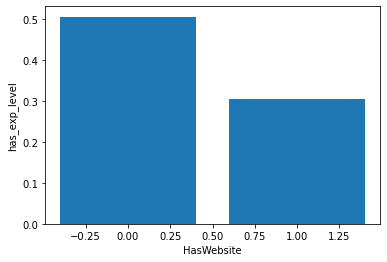

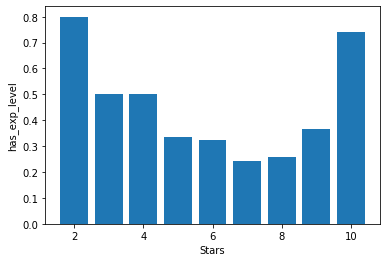

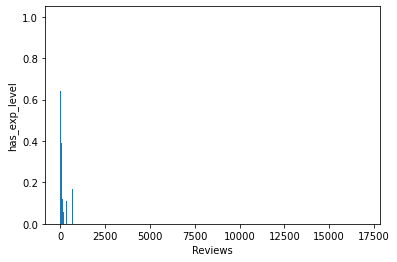

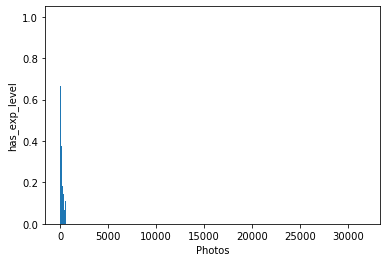

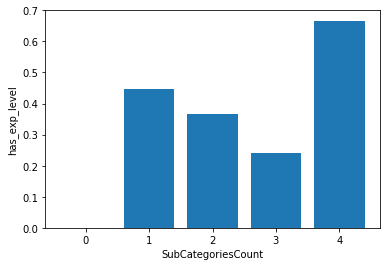

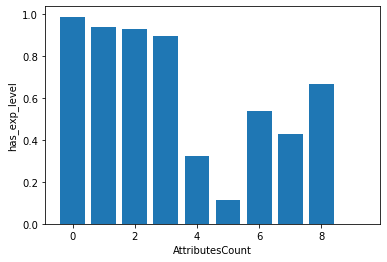

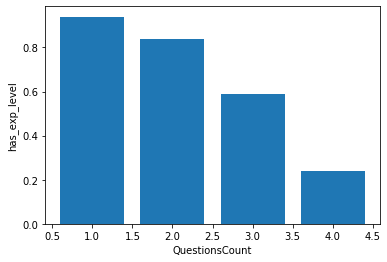

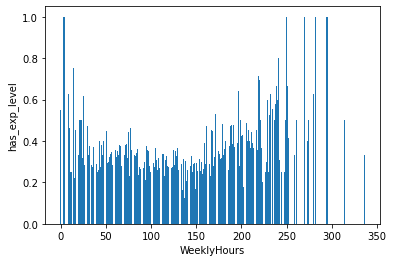

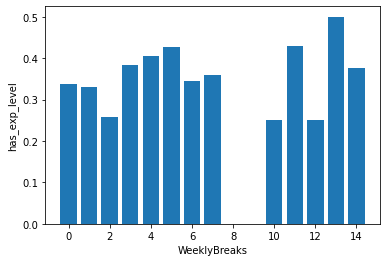

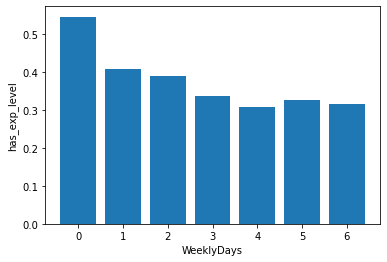

In [33]:
#shows the how much 
for collumn in first_collumns:
    mean_df= df[[target_collumn,collumn]].groupby([collumn]).mean()
    plt.bar(mean_df.index,mean_df[target_collumn].values)
    plt.xlabel(collumn)
    plt.ylabel(target_collumn)
    plt.show()

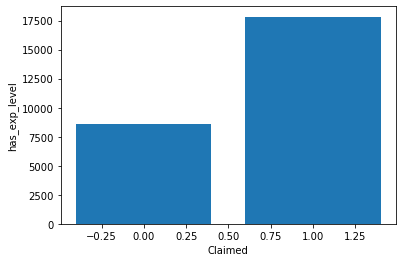

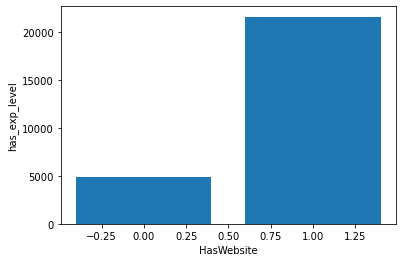

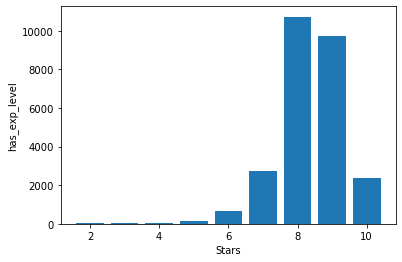

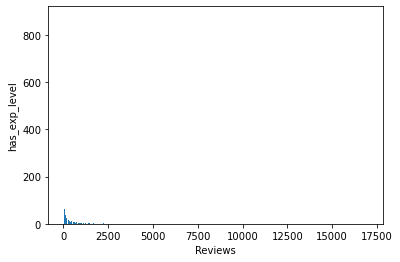

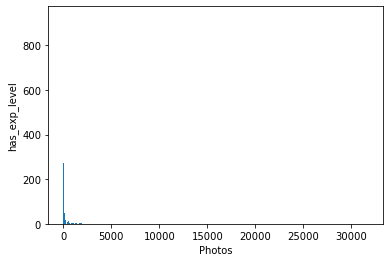

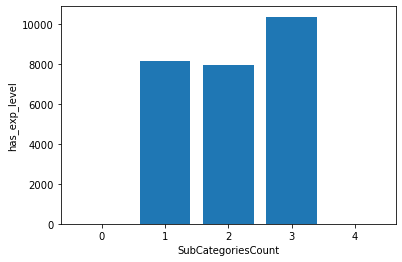

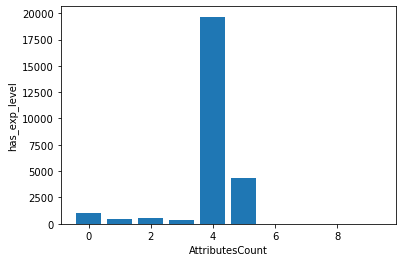

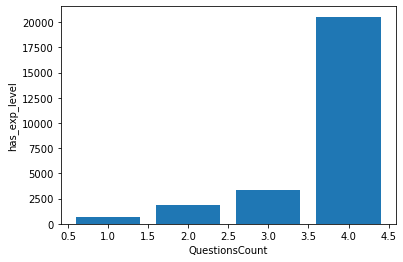

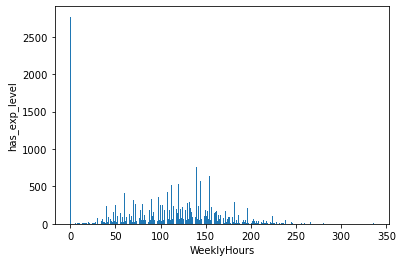

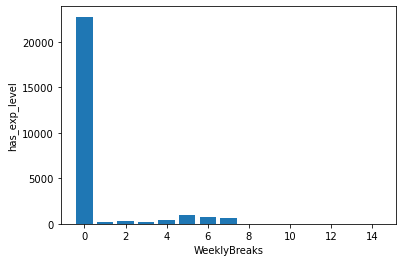

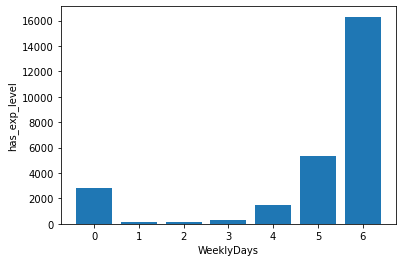

In [35]:
for collumn in first_collumns:
    count_df= df[[target_collumn,collumn]].groupby([collumn]).count()
    plt.bar(count_df.index,count_df[target_collumn].values)
    plt.xlabel(collumn)
    plt.ylabel(target_collumn)
    plt.show()